In [2]:
import git
from pathlib import Path
import os
ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from transform import *
from plotting import *
os.chdir(os.path.join(ROOT_DIR, "dataset-preparation"))

#data_dir = data_dir = os.path.join(ROOT_DIR, 'raw-data','pastis','full-pastis-RGB')
data_dir = data_dir = os.path.join(ROOT_DIR, 'raw-data','agriVision','toy-agriVision-RGB-cleaned')
# iterate over files in that directory
file_list = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir) if filename != ".DS_Store"]
file_names = os.listdir(data_dir)

In [3]:
np.random.seed(45)

In [4]:
image = npz_opener(file_list[0])[:,:,0]
#image = np.array(Image.open(file_list[0]).convert("L"))

In [5]:
image = image-np.mean(image)
#image = image/np.std(image)

In [221]:
#image = np.random.permutation(image)

In [6]:
image.shape

(512, 512)

In [7]:
np.var(image.flatten())

7.776767929798734

In [12]:
np.var(pywt.coeffs_to_array(pywt.wavedec2(image, 'haar', level=9))[0])

7.776767588623335

In [224]:
np.var(image.flatten()) * np.prod(image.shape)

32380.353702961133

In [260]:
pywt.swt2(image, level = 7, wavelet='db1', norm= True, trim_approx=True)[6][1]

array([[ 0.29033675,  0.08735796, -0.05395639, ...,  0.02312417,
        -0.04367898,  0.16443852],
       [ 0.34686249,  0.14131435, -0.0745112 , ...,  0.05652574,
         0.0051387 ,  0.2132562 ],
       [ 0.30832222,  0.15416111, -0.05909509, ...,  0.05909509,
         0.10020472,  0.22610296],
       ...,
       [-0.37769471, -0.57296545, -0.25693518, ..., -0.0693725 ,
         0.03597093,  0.11048213],
       [-0.15416111, -0.39311083, -0.17214657, ..., -0.05652574,
        -0.03340157,  0.1490224 ],
       [ 0.05138704, -0.17214657, -0.12075953, ..., -0.02569352,
        -0.02312417,  0.17728527]])

In [270]:
result=0
for i in range(7):
    result+= np.var(pywt.swt2(image, level = 7, wavelet='db1', norm= True, trim_approx=True))
    # np.var(pywt.swt2(image, level = 7, wavelet='db1', norm= True, trim_approx=True)[i][0])
    # np.var(pywt.swt2(image, level = 7, wavelet='db1', norm= True, trim_approx=True)[i][1])
    # np.var(pywt.swt2(image, level = 7, wavelet='db1', norm= True, trim_approx=True)[i][2])
result

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (8,) + inhomogeneous part.

In [254]:
np.var(pywt.wavedec(image, wavelet='db1')[0])

44.47030581043229

In [194]:
np.var(scipy.fft.fft2(image, norm = 'ortho').flatten())

5.575483846928323

In [184]:
np.var(np.fft.fft2(image))/np.prod(image.shape)

5.575483846928323

(array([2.300e+01, 5.900e+01, 8.600e+01, 1.980e+02, 2.210e+02, 4.190e+02,
        3.330e+02, 6.130e+02, 4.090e+02, 6.880e+02, 9.860e+02, 7.270e+02,
        1.394e+03, 9.260e+02, 1.105e+03, 4.900e+02, 7.300e+02, 4.100e+02,
        4.920e+02, 4.010e+02, 1.990e+02, 2.910e+02, 1.880e+02, 2.400e+02,
        1.440e+02, 1.740e+02, 9.800e+01, 1.380e+02, 8.500e+01, 1.420e+02,
        1.200e+02, 8.600e+01, 1.340e+02, 9.200e+01, 1.320e+02, 1.080e+02,
        1.310e+02, 1.070e+02, 1.850e+02, 2.400e+02, 1.690e+02, 3.120e+02,
        2.520e+02, 3.970e+02, 2.660e+02, 3.650e+02, 2.360e+02, 2.270e+02,
        1.030e+02, 1.410e+02, 8.800e+01, 2.400e+01, 1.800e+01, 6.000e+00,
        3.000e+00, 2.000e+00, 4.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        3.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+0

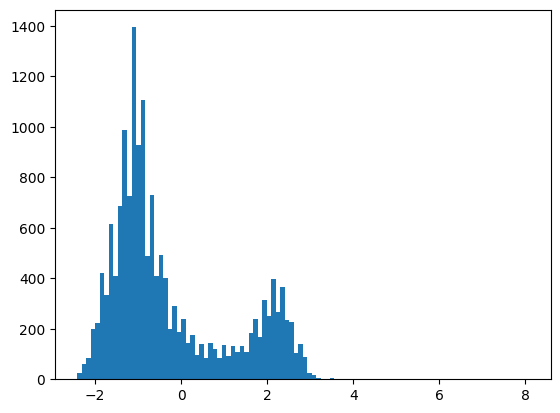

In [50]:
plt.hist(image.flatten(), bins=100)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 4.0000e+00, 0.0000e+00, 2.0000e+00,
        6.0000e+00, 4.0000e+00, 8.0000e+00, 4.0000e+00, 2.0000e+01,
        1.4000e+01, 2.4000e+01, 6.4000e+01, 9.4000e+01, 2.1600e+02,
        1.0230e+03, 1.2138e+04, 2.1700e+03, 3.4000e+02, 1.0000e+02,
        5.4000e+01, 1.6000e+01, 1.6000e+01, 8.0000e+00, 1.0000e+01,
        1.2000e+01, 2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        6.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00,
        4.0000e+00, 2.0000e+00, 0.0000e+00, 0.00

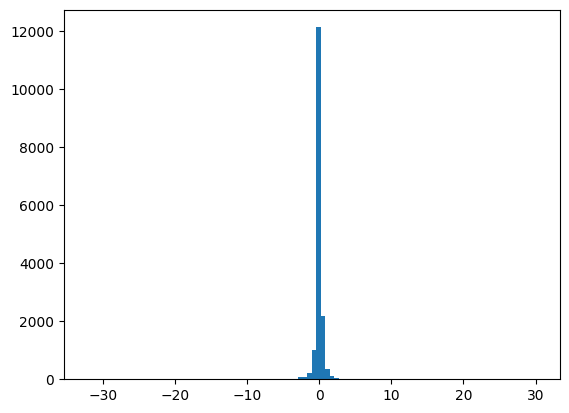

In [51]:
plt.hist(np.real(np.fft.fft2(image, norm="ortho").flatten()), bins=100)

In [31]:
np.real(np.fft.fft2(image, norm="ortho"))

array([[ 7.07911152e+04, -2.49539484e+03, -1.07131404e+03, ...,
        -1.31958320e+02, -1.07131404e+03, -2.49539484e+03],
       [-2.00806262e+03, -2.24038802e+02, -9.11412848e+01, ...,
         9.56974064e+02,  1.48007424e+03,  1.18820371e+01],
       [ 7.16803874e+01, -2.19287577e+02,  3.16220437e+02, ...,
        -4.88474092e+02,  8.76929264e+02,  4.72992149e+02],
       ...,
       [-8.09509120e+02,  5.20415845e+02,  2.03895303e+02, ...,
         2.36938972e+02,  1.36520669e+02,  4.10946367e+02],
       [ 7.16803874e+01,  4.72992149e+02,  8.76929264e+02, ...,
         3.61453248e+01,  3.16220437e+02, -2.19287577e+02],
       [-2.00806262e+03,  1.18820371e+01,  1.48007424e+03, ...,
         4.36531078e+02, -9.11412848e+01, -2.24038802e+02]])

In [18]:
np.var(np.real(np.fft.fft2(image).flatten())[1:])

64497863.3110908

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00,
        2.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00, 6.0000e+00,
        1.0000e+00, 3.0000e+00, 5.0000e+00, 4.0000e+00, 8.0000e+00,
        1.3000e+01, 1.2000e+01, 1.8000e+01, 1.2000e+01, 2.1000e+01,
        2.2000e+01, 3.5000e+01, 5.5000e+01, 7.5000e+01, 8.7000e+01,
        1.1000e+02, 1.5600e+02, 2.1500e+02, 2.5300e+02, 3.2900e+02,
        4.0400e+02, 5.5000e+02, 6.6800e+02, 8.1800e+02, 1.0960e+03,
        1.3650e+03, 1.7590e+03, 2.2960e+03, 2.8470e+03, 3.7480e+03,
        4.8600e+03, 6.0880e+03, 7.9840e+03, 1.0214e+04, 1.2952e+04,
        1.6770e+04, 2.1375e+04, 2.7486e+04, 3.0037e+04, 2.3620e+04,
        1.8291e+04, 1.4409e+04, 1.1190e+04, 8.7770e+03, 6.8110e+03,
        5.2950e+03, 4.0910e+03, 3.2520e+03, 2.6160e+03, 2.0120e+03,
        1.5590e+03, 1.1900e+03, 9.4800e+02, 7.6800e+02, 5.6900e+02,
        4.1100e+02, 3.4600e+02, 2.6100e+02, 2.26

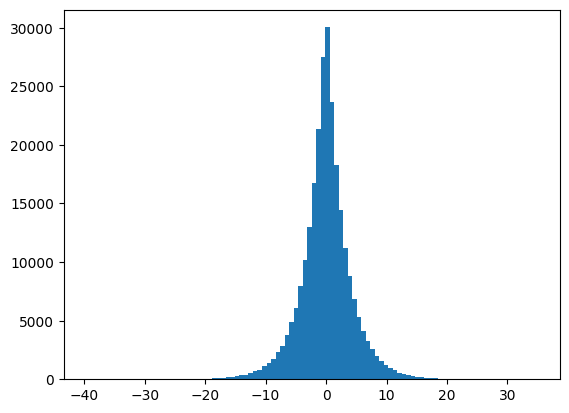

In [12]:
plt.hist(scipy.stats.laplace.rvs(0, scale=3, size=2**18), bins=100)

In [13]:
pywt.wavedec2(image, wavelet='db1')[-1]

(array([[-64.5, -61.5, -55. , ...,   8. ,  14.5,   8. ],
        [ 20.5,  10.5,   3.5, ..., -16. , -22. , -23. ],
        [ 39. ,  14. ,   8. , ...,  18.5,   9.5,   7.5],
        ...,
        [-11. , -25.5, -36.5, ..., -20.5, -23. , -19. ],
        [-12. , -19.5, -19.5, ...,  22.5,  15. ,  12.5],
        [  0.5,  -4. ,   0.5, ...,  -1. , -20.5, -32.5]]),
 array([[-3.5,  2.5, -1. , ...,  4. ,  2.5,  3. ],
        [-2.5, -0.5, -4.5, ...,  2. ,  0. ,  0. ],
        [ 2. ,  2. ,  1. , ...,  0.5, -1.5,  5.5],
        ...,
        [-4. ,  7.5, 10.5, ...,  0.5, -4. , -2. ],
        [ 4. , -2.5,  2.5, ..., -5.5, -7. ,  4.5],
        [ 0.5, -4. , -0.5, ...,  4. , -5.5,  2.5]]),
 array([[-1.5, -5.5,  3. , ..., -1. ,  0.5,  3. ],
        [ 4.5,  0.5,  3.5, ..., -1. ,  4. , -5. ],
        [ 4. ,  5. ,  0. , ...,  2.5,  3.5, -5.5],
        ...,
        [-2. ,  1.5,  5.5, ...,  0.5,  0. ,  5. ],
        [ 6. ,  1.5,  2.5, ..., -2.5,  3. , -0.5],
        [ 0.5,  2. , -2.5, ..., -2. ,  8.5, -5.5]]))

In [14]:
image = npz_opener(file_list[0])[:,:,0]

ValueError: Cannot load file containing pickled data when allow_pickle=False

In [ ]:
print(np.mean(image))
print(np.var(image))

0.02417683590689903
12.644899259857253


In [ ]:
pywt.swt2(image, 'db1', level = 2, norm=True)

i = 1
for layer in pywt.dw2(image, 'db1', level = 2,  norm=False):
    print(f"layer {i}")
    i += 1
    print(np.mean(layer))
    print(np.var(layer))

layer 1


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

0.4149303926459034

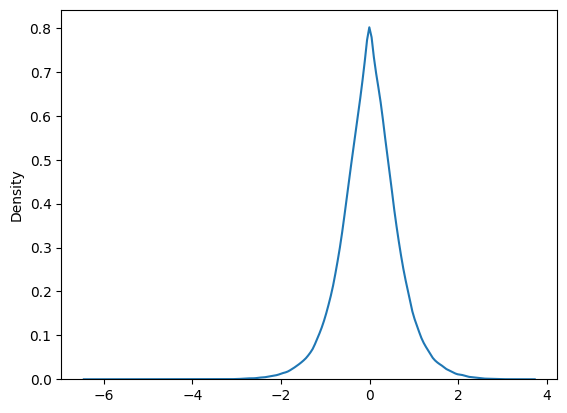

In [ ]:
i = 8
sns.kdeplot(pywt.swt2(image, 'db1', level = 9, norm=True)[i][1][0].flatten())
np.mean(pywt.swt2(image, 'db1', level = 9, norm=True)[i][1][0].flatten())
np.var(pywt.swt2(image, 'db1', level = 9, norm=True)[i][1][0].flatten())

In [ ]:
pywt.swt2(image, 'db1', level = 9, norm=True)[1][1][0].flatten()

array([1.25310632, 1.24689988, 1.24147331, ..., 1.22547638, 1.23313709,
       1.23804748])

In [ ]:
fourier = np.concatenate((np.real(np.fft.fft2(image, norm  = 'ortho')), np.imag(np.fft.fft2(image, ))))
print(np.mean(fourier))
print(np.var(fourier))

0.010574197902307392
6.322630075964583


In [ ]:
fourier_real = np.fft.fft2(image, norm  = 'ortho')
print(np.mean(fourier_real))
print(np.var(fourier_real))

(0.021148395804614778+3.469446951953614e-18j)
12.645036524606613


In [ ]:
#Values obtained from plots in agriVisionFourierEDA.ipynb
STARTING_VALUE = 0.008052940675034493
ENDING_VALUE =0.6162627813472334
MULT_FACTOR = 1.15
BATCH_NUM = 0
RAW_DATA_SUFFIX = "agriVision-RGB-cleaned"
if BATCH_NUM is None:
    batch_dir = os.path.join(ROOT_DIR, "raw-data", "agriVision", f"full-{RAW_DATA_SUFFIX}")
else:
    batch_dir = os.path.join(ROOT_DIR, "raw-data", "agriVision", f"batch{BATCH_NUM}-{RAW_DATA_SUFFIX}")
splits = getSplits(STARTING_VALUE,ENDING_VALUE, MULT_FACTOR)
print(splits)

[0.008052940675034493, 0.009260881776289667, 0.010650014042733115, 0.012247516149143082, 0.014084643571514543, 0.016197340107241723, 0.01862694112332798, 0.021420982291827175, 0.02463412963560125, 0.028329249080941435, 0.03257863644308265, 0.037465431909545044, 0.0430852466959768, 0.04954803370037331, 0.056980238755429305, 0.0655272745687437, 0.07535636575405526, 0.08665982061716354, 0.09965879370973807, 0.11460761276619877, 0.13179875468112856, 0.15156856788329784, 0.1743038530657925, 0.20044943102566135, 0.23051684567951053, 0.2650943725314371, 0.30485852841115263, 0.3505873076728255, 0.4031754038237493, 0.4636517143973116, 0.5331994715569083, 0.6131793922904445, 0.7051563011340111]


In [ ]:
TRANSFORM = "fourier"
channel = "red"
CONSTANT_SAMPLE_SIZE = int(1e5)
channel_fr = convert_to_fourier_basis(batch_dir, channel, split_list = splits, debug = True, image_opener = npz_opener)
channel_fr['data'] = channel_fr['data'].apply(lambda x : x.astype(np.float32))


min_group, max_group = 2, max(channel_fr['band'])
group_data_map = dict()
group_data_map_uncapped = dict()
group_data_map_size = dict()
for group in np.arange(min_group, max_group + 1):
    data = channel_fr[(channel_fr['band'] == group)]['data'].iloc[0]
    group_data_map[group] = np.sort(data)[np.round(np.linspace(0, data.size - 1, min(data.size, CONSTANT_SAMPLE_SIZE))).astype(int)] 
    group_data_map_uncapped[group] = np.sort(data)
    group_data_map_size[group] = data.size



channel_fr.head()


100%|██████████| 4500/4500 [03:38<00:00, 20.62it/s]


[0.00805294 0.00926088 0.01065001 0.01224752 0.01408464 0.01619734
 0.01862694 0.02142098 0.02463413 0.02832925 0.03257864 0.03746543
 0.04308525 0.04954803 0.05698024 0.06552727 0.07535637 0.08665982
 0.09965879 0.11460761 0.13179875 0.15156857 0.17430385 0.20044943
 0.23051685 0.26509437 0.30485853 0.35058731 0.4031754  0.46365171
 0.53319947 0.61317939 0.7051563 ]


100%|██████████| 33/33 [01:42<00:00,  3.12s/it]


,band,channel,magnitude_endpoints,unique_magnitudes,data
0,1,red,"(0.0, 0.0078125)",10,"[6337.8125, 199048.12, -36357.71, -269007.9, -..."
1,2,red,"(0.008052940675034493, 0.008734640537108554)",3,"[11581.085, -309.07315, 3838.6318, 1758.8693, ..."
2,3,red,"(0.009765625, 0.010517900013934578)",3,"[5979.6646, -1056.734, -1031.5107, 25.417187, ..."
3,4,red,"(0.011048543456039806, 0.01188039556698871)",4,"[-9658.832, 1283.9543, 2213.072, -480.18253, 1..."
4,5,red,"(0.012352647110032733, 0.014084184669781208)",6,"[-2516.0254, 430.97522, -557.7469, -959.0976, ..."


In [ ]:
for group in np.arange(min_group, max_group + 1):
    print(f"Group {group}")
    print("Capped")
    print(group_data_map[group].var())
    print(group_data_map[group].mean())
    print("Uncapped")
    print(group_data_map_uncapped[group].var())
    print(group_data_map_uncapped[group].mean())

Group 2
Capped
443144800.0
186.28676
Uncapped
443144800.0
186.28676
Group 3
Capped
711790140.0
-23.169777
Uncapped
711790140.0
-23.169777
Group 4
Capped
445181380.0
34.924698
Uncapped
445181380.0
34.924698
Group 5
Capped
242532050.0
10.30064
Uncapped
242393140.0
10.090119
Group 6
Capped
152698860.0
23.32496
Uncapped
151038720.0
21.727936
Group 7
Capped
100562824.0
-19.02916
Uncapped
99463110.0
-19.568748
Group 8
Capped
75098780.0
-8.60072
Uncapped
72788010.0
-8.275979
Group 9
Capped
96343710.0
-12.27768
Uncapped
78038200.0
-11.400243
Group 10
Capped
63162400.0
1.52292
Uncapped
52926556.0
-1.5030707
Group 11
Capped
66805550.0
11.98614
Uncapped
48006836.0
8.049536
Group 12
Capped
48017270.0
-8.93468
Uncapped
36563504.0
-4.1965184
Group 13
Capped
35175330.0
5.2444
Uncapped
22066522.0
5.588
Group 14
Capped
19646696.0
2.96524
Uncapped
16291675.0
5.0771923
Group 15
Capped
15428455.0
0.29362
Uncapped
12758729.0
0.6544613
Group 16
Capped
13901276.0
-2.93038
Uncapped
9826714.0
-1.9836968
Group 

In [ ]:
import numpy as np

# Sample 10,000 points from a Gaussian distribution with variance 5
mean = 0
variance = 5
sample_size = 10000
gaussian_samples = np.random.normal(mean, np.sqrt(variance), sample_size)

# Apply Fourier transform
fourier_transform = np.fft.fft(gaussian_samples, norm='ortho')

# Compute variance of the Fourier transformed data
variance_fourier = np.var(fourier_transform)

print("Variance of the Fourier transformed data:", variance_fourier)
print("Variance of the Fourier transformed data Divided:", variance_fourier/sample_size)

Variance of the Fourier transformed data: 4.852111183082756
Variance of the Fourier transformed data Divided: 0.0004852111183082756


In [ ]:
fourier_transform

array([-118.20287687 +0.j        ,  385.88599193-55.86526008j,
        -56.09348234-71.73835199j, ...,  -62.82705387-54.51082374j,
        -56.09348234+71.73835199j,  385.88599193+55.86526008j])

In [ ]:
x = np.arange(0, 11)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [201]:
image == scipy.fft.ifft2(scipy.fft.fft2(image, norm = 'ortho'))

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [214]:
reconstructed_image = scipy.fft.ifft2(scipy.fft.fft2(image, norm='ortho'), norm='ortho')

In [215]:
reconstructed_image

array([[-0.68116929+0.00000000e+00j, -0.92782706-6.93889390e-18j,
        -1.33892335-5.55111512e-17j, ..., -1.09226557-7.28583860e-17j,
        -1.09226557-3.58849955e-17j, -0.96893669-1.45512510e-16j],
       [-0.5578404 -6.07695318e-17j, -0.80449817-1.18340667e-16j,
        -1.29781372-1.50482021e-16j, ..., -0.59895003-5.24211750e-17j,
        -0.92782706-1.22420052e-16j, -1.21559446-1.54242434e-16j],
       [-0.68116929-4.42354486e-17j, -0.88671743-1.76941795e-16j,
        -1.25670409-9.28077060e-17j, ..., -0.59895003-6.35384401e-17j,
        -0.59895003+3.03576608e-17j, -0.80449817-3.40992065e-17j],
       ...,
       [ 1.66207956-2.60410499e-17j,  1.08654475-2.25312074e-17j,
         2.40205287+1.00049566e-16j, ...,  1.70318918+2.41146761e-16j,
         1.53875067+3.22094171e-16j,  1.53875067+4.30180554e-16j],
       [ 1.99095659-2.50421884e-16j,  1.04543512-2.93430697e-16j,
         2.19650473-6.13370247e-17j, ...,  1.66207956-3.71526796e-16j,
         1.5798603 +1.73292711e-16j

In [216]:
image

array([[-0.68116929, -0.92782706, -1.33892335, ..., -1.09226557,
        -1.09226557, -0.96893669],
       [-0.5578404 , -0.80449817, -1.29781372, ..., -0.59895003,
        -0.92782706, -1.21559446],
       [-0.68116929, -0.88671743, -1.25670409, ..., -0.59895003,
        -0.59895003, -0.80449817],
       ...,
       [ 1.66207956,  1.08654475,  2.40205287, ...,  1.70318918,
         1.53875067,  1.53875067],
       [ 1.99095659,  1.04543512,  2.19650473, ...,  1.66207956,
         1.5798603 ,  1.45653141],
       [ 2.1553951 ,  0.46990032,  2.03206622, ...,  1.5798603 ,
         1.74429881,  1.5798603 ]])